In [ ]:
"""
EcoSim: Simulation Predator-Prey Dynamics

This module simulates a complex ecosystem with predator-prey interactions,
environmental events, and population dynamics.

Key Components:
- Agent-based modeling of ecosystem interactions
- Stochastic population dynamics
- Environmental event simulation

Developed using principles of ecological modeling and agent-based simulation.

Tools and Technologies
NumPy: For creating the grid and performing random number generation to simulate movement, reproduction, and survival.

Pandas: To track population data over time and perform data analysis.

Matplotlib: For dynamic line charts and heatmaps that represent population trends and habitat states.

Streamlit: For creating an interactive UI to control simulation parameters like species types, reproduction rates, and random events.


"""

'\nEcoSim: Ecosystem Dynamics Simulation\n\nThis module simulates a complex ecosystem with predator-prey interactions,\nenvironmental events, and population dynamics.\n\nKey Components:\n- Agent-based modeling of ecosystem interactions\n- Stochastic population dynamics\n- Environmental event simulation\n\nDeveloped using principles of ecological modeling and agent-based simulation.\n\nTools and Technologies\nNumPy: For creating the grid and performing random number generation to simulate movement, reproduction, and survival.\n\nPandas: To track population data over time and perform data analysis.\n\nMatplotlib: For dynamic line charts and heatmaps that represent population trends and habitat states.\n\nStreamlit: For creating an interactive UI to control simulation parameters like species types, reproduction rates, and random events.\n\nReferences:\n- Lotka, A. J., & Volterra, V. (1926). Studies on population dynamics. \n  Proceedings of the National Academy of Sciences, 12(6), 410-425

In [8]:
# Install a pip package 
import sys
!{sys.executable} -m pip install -r requirements.txt

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


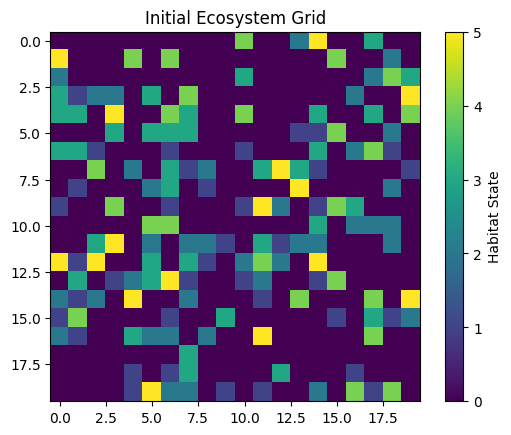

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

# Define grid size
grid_size = 20

# Initialize the grid with random prey (1) and predators (2)
grid = np.random.choice([0, 1, 2, 3, 4, 5], size=(grid_size, grid_size), p=[0.6, 0.1, 0.1, 0.1, 0.05, 0.05])

# Display the initial grid
plt.imshow(grid, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], label='Habitat State')
plt.title('Initial Ecosystem Grid')
plt.show()

In [ ]:
def simulate_step(grid): #to simulate each step of the ecosystem
    new_grid = grid.copy() #create a copy of the current grid to update
    for i in range(grid_size): 
        for j in range(grid_size):
            if grid[i, j] == 1:  # Prey numbers to check before proceding to the next step 
                # Prey reproduction
                if np.random.rand() < 0.05: # 5% chance of reproduction (Ai used in here line to understand the logic of the random and to set the right percentage)
                    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)] # (Ai used in here line to undestand the neighboring cells of the current cell)
                    for ni, nj in neighbors:
                        if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] == 0: 
                            new_grid[ni, nj] = 1 #new prey in the empty cell
                            break
            elif grid[i, j] == 2:  # Predator   
                # Predator hunting
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)] #check cells if it contains predator
                for ni, nj in neighbors: 
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] == 1: #(Ai used in here to define the neighboring cells)
                        new_grid[ni, nj] = 2 #after the hunting the predator will claim for awhile the cell.
                        new_grid[i, j] = 0 #original cell of the predator will become empty
                        break
                else: 
                    # Predator starvation
                    if np.random.rand() < 0.1: #10% chance of starvation used the same method as the reproduction
                        new_grid[i, j] = 0
            elif grid[i, j] == 5:  # New predator type
                # New predator hunting
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]  #(Used the same Ai enchanced code to define the neighboring cells)
                for ni, nj in neighbors:
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] in [1, 2]: #The super predator will hunt the prey or the weaker predator
                        new_grid[ni, nj] = 5 
                        new_grid[i, j] = 0 # the first predator will die and leave the cell empty
                        break
                else:
                    # New predator starvation
                    if np.random.rand() < 0.1:  # 10% chance of reproduction (Ai used in here line to understand the logic of the random and to set the right percentage)
                        new_grid[i, j] = 0 # new predator dies and will empty the cell.
    return new_grid

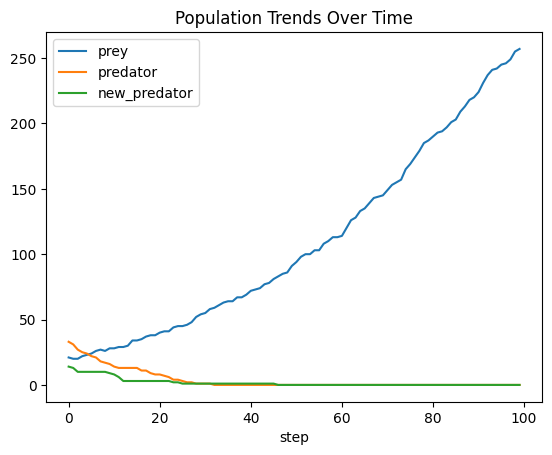

In [ ]:
# Initialize population data
population_data = []

# Simulate and track population data
for step in range(100): #simulation 100 steps
    grid = simulate_step(grid)
    prey_count = np.count_nonzero(grid == 1)
    predator_count = np.count_nonzero(grid == 2)
    new_predator_count = np.count_nonzero(grid == 5)
    population_data.append({'step': step, 'prey': prey_count, 'predator': predator_count, 'new_predator': new_predator_count})

# Convert to DataFrame
population_df = pd.DataFrame(population_data)

# Display population trends
population_df.plot(x='step', y=['prey', 'predator', 'new_predator'], title='Population Trends Over Time')
plt.show()

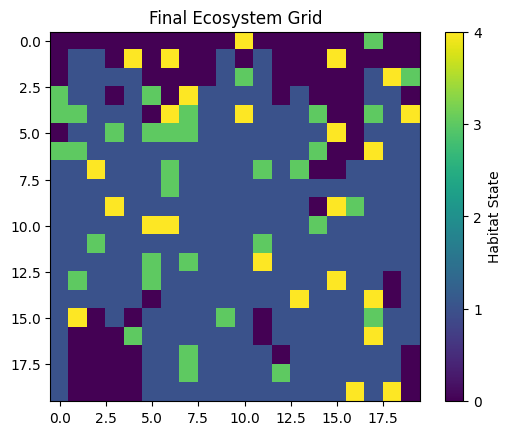

In [5]:
# Display the final grid
plt.imshow(grid, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], label='Habitat State')
plt.title('Final Ecosystem Grid')
plt.show()

In [ ]:
# Calculate advanced statistics
def calculate_statistics(population_df):
    # Biodiversity index measure of total ecosystem diversity
    population_df['biodiversity_index'] = population_df['prey'] + population_df['predator'] + population_df['new_predator'] #(Ai enchanced code for better statistic presentation)
    
    # Species survival probability ratio of prey population to total population
    population_df['survival_probability'] = population_df['prey'] / (population_df['prey'] + population_df['predator'] + population_df['new_predator']) #(Ai enchanced code for better statistic presentation)
    
    return population_df

# Calculate and display advanced statistics
population_df = calculate_statistics(population_df) 
print('Advanced Statistics')
print(population_df[['biodiversity_index', 'survival_probability']])

Advanced Statistics
    biodiversity_index  survival_probability
0                   68              0.308824
1                   64              0.312500
2                   57              0.350877
3                   57              0.385965
4                   57              0.403509
..                 ...                   ...
95                 245              1.000000
96                 246              1.000000
97                 249              1.000000
98                 255              1.000000
99                 257              1.000000

[100 rows x 2 columns]
